In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df_data_general = pd.read_csv('../../data/data_general.csv')

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
columns = ['AVG_BET_std',
        'INITIAL_AMOUNT_std', 'GAMES_PLAYED_TOTAL_std',
        'GAMES_WON_TOTAL_std', 'Rango_Edad_le']
components = pca.fit_transform(df_data_general[columns])
df_data_general['PCA1'] = components[:, 0]
df_data_general['PCA2'] = components[:, 1]

# PCAs

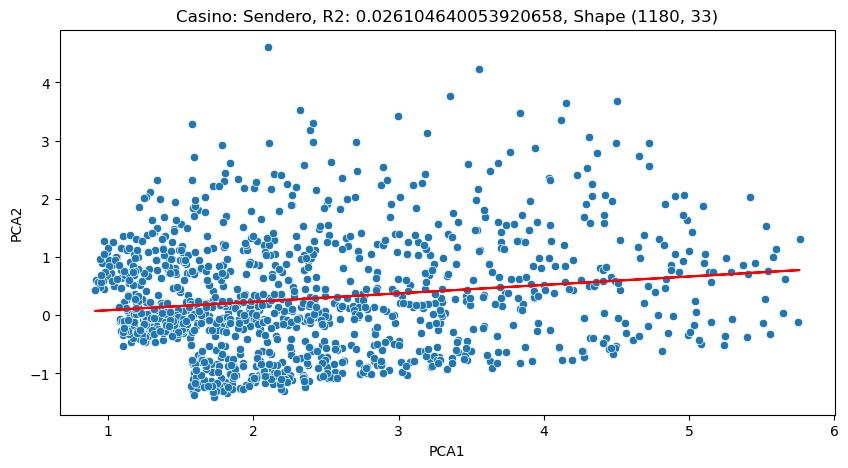

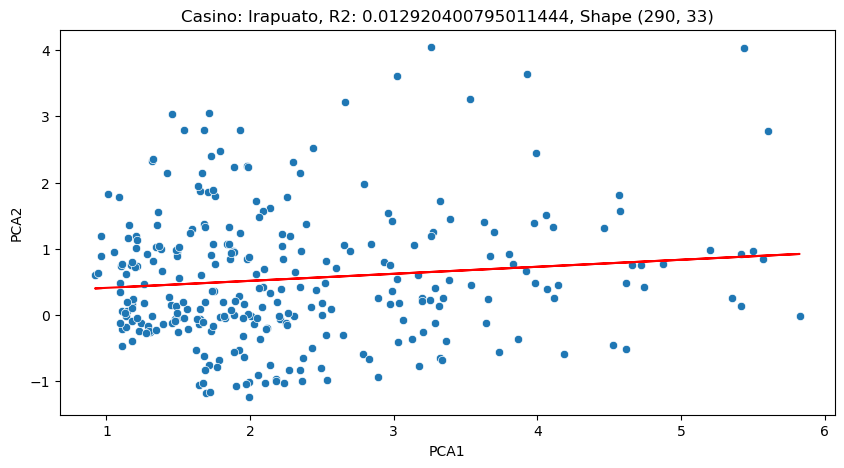

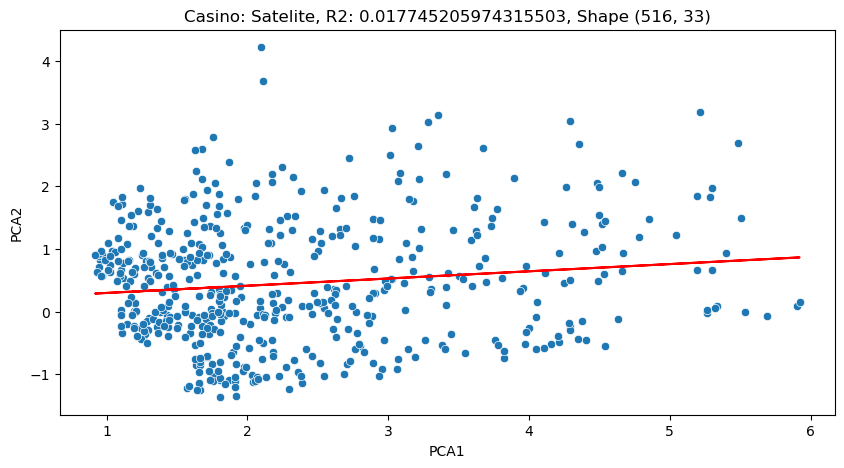

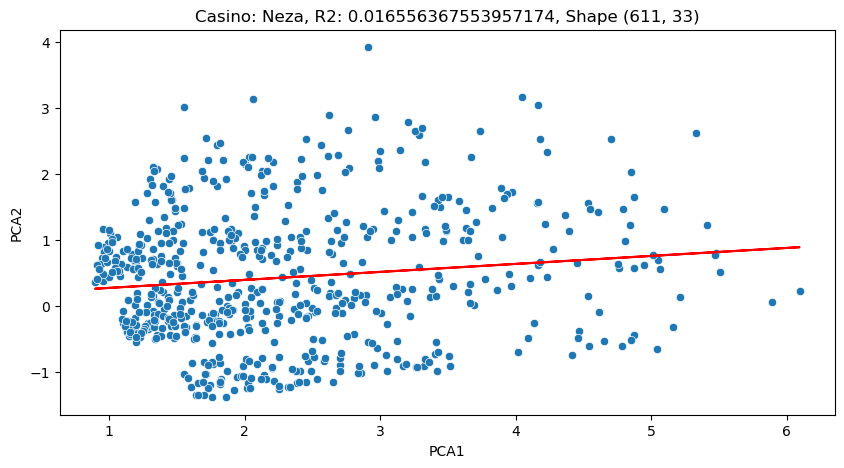

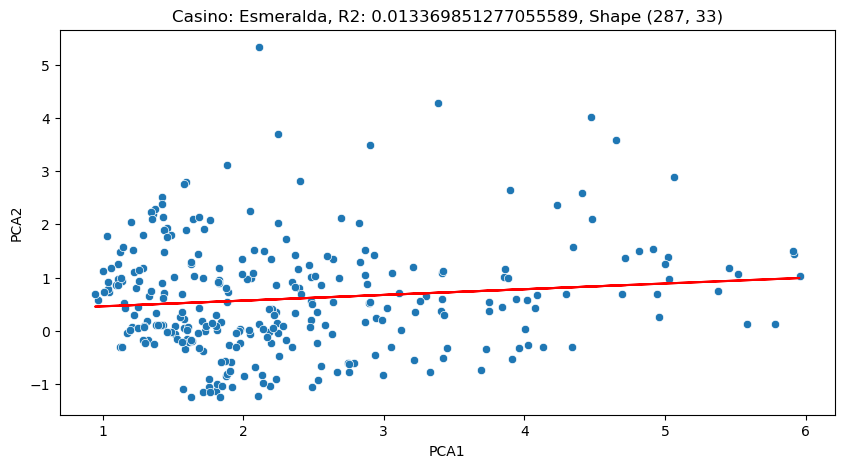

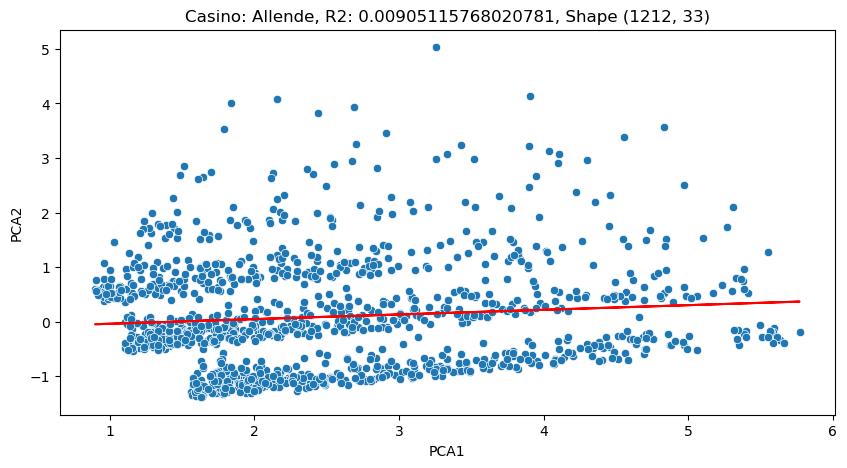

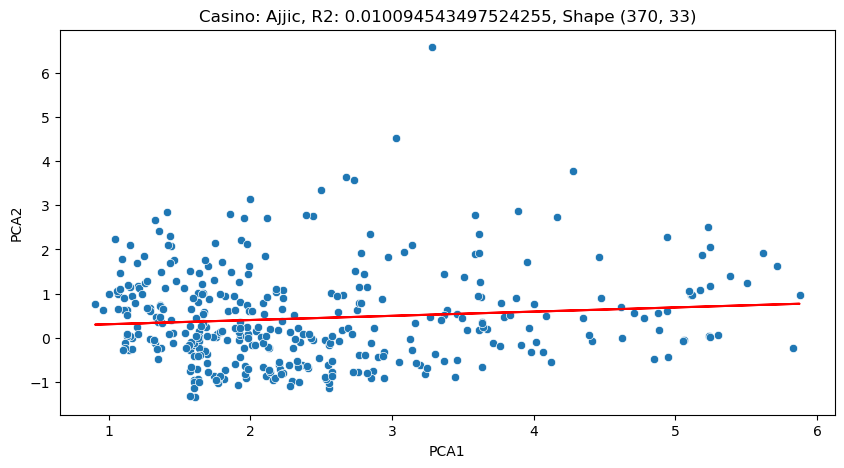

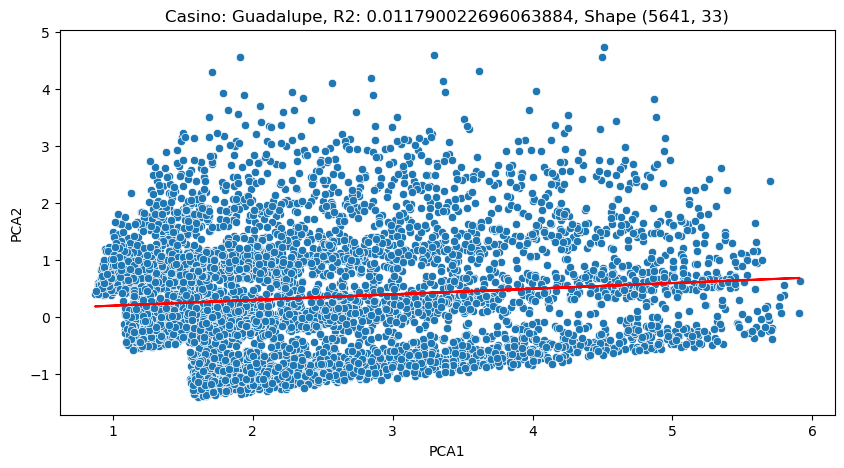

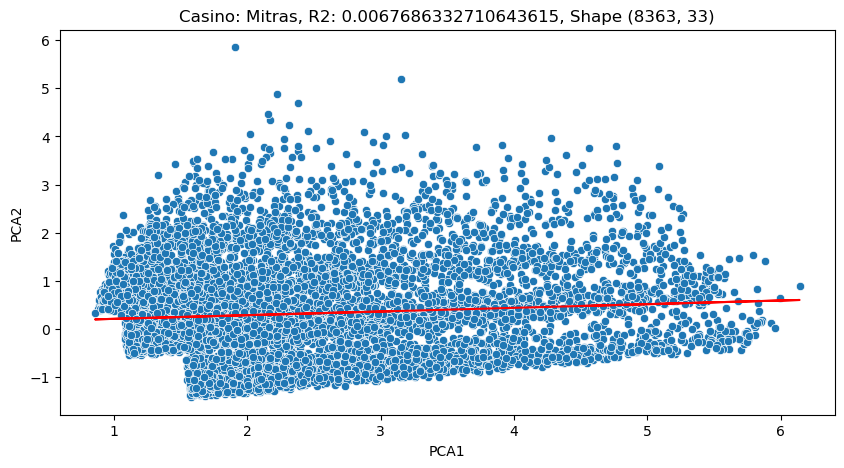

In [15]:
df_cluster_1 = df_data_general[df_data_general['Cluster'] == 1] 
casinos = df_cluster_1['Casino'].unique()

for casino in casinos:
    lr = LinearRegression()
    
    df_casino_cluster = df_cluster_1.loc[df_cluster_1['Casino'] == casino]

    X = df_casino_cluster[['PCA1']]  # Ahora es DataFrame (2D)
    y = df_casino_cluster['PCA2']    # y puede ser Series (1D)
    
    lr.fit(X, y)
    y_hat = lr.predict(X)  # También se mantiene 2D en predict
    r2 = r2_score(y, y_hat)
    plt.figure(figsize=(10,5))
    plt.title(f"Casino: {casino}, R2: {r2}, Shape {df_casino_cluster.shape}")
    sns.scatterplot(data=df_casino_cluster, x='PCA1', y='PCA2')
    plt.plot(df_casino_cluster['PCA1'], y_hat, color='red')
    plt.show()

In [16]:
from scipy.stats import pearsonr

df_cluster_1 = df_data_general[df_data_general['Cluster'] == 1] 
casinos = df_cluster_1['Casino'].unique()

for casino in casinos:
    df_casino_cluster = df_cluster_1.loc[df_cluster_1['Casino'] == casino]
    
    r, p_value = pearsonr(df_casino_cluster['PCA1'], df_casino_cluster['PCA2'])
    
    print(f"Casino: {casino}")
    print(f"  Coeficiente de correlación: {r:.4f}")
    print(f"  p-valor: {p_value:.4e}")
    print("---")

Casino: Sendero
  Coeficiente de correlación: 0.1616
  p-valor: 2.3926e-08
---
Casino: Irapuato
  Coeficiente de correlación: 0.1137
  p-valor: 5.3162e-02
---
Casino: Satelite
  Coeficiente de correlación: 0.1332
  p-valor: 2.4281e-03
---
Casino: Neza
  Coeficiente de correlación: 0.1287
  p-valor: 1.4361e-03
---
Casino: Esmeralda
  Coeficiente de correlación: 0.1156
  p-valor: 5.0361e-02
---
Casino: Allende
  Coeficiente de correlación: 0.0951
  p-valor: 9.1248e-04
---
Casino: Ajjic
  Coeficiente de correlación: 0.1005
  p-valor: 5.3488e-02
---
Casino: Guadalupe
  Coeficiente de correlación: 0.1086
  p-valor: 2.8957e-16
---
Casino: Mitras
  Coeficiente de correlación: 0.0823
  p-valor: 4.8702e-14
---


# Initial Amount v Games Won

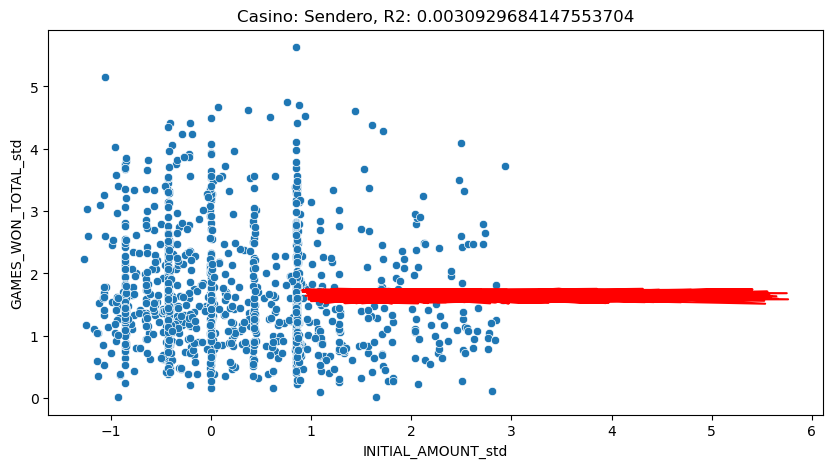

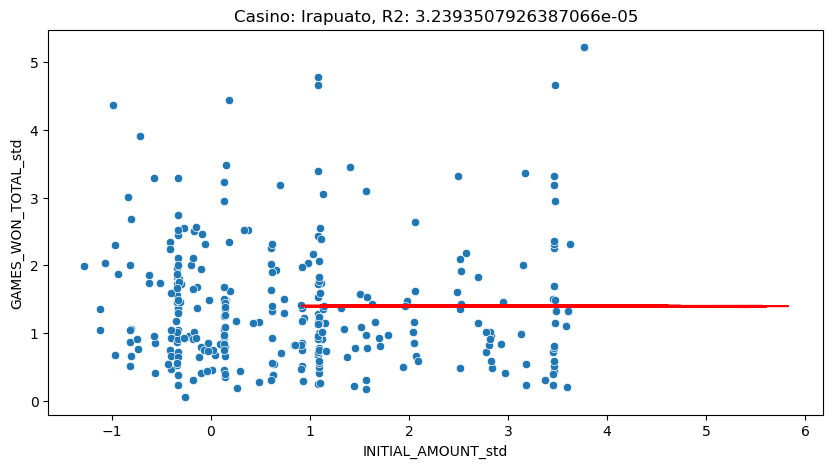

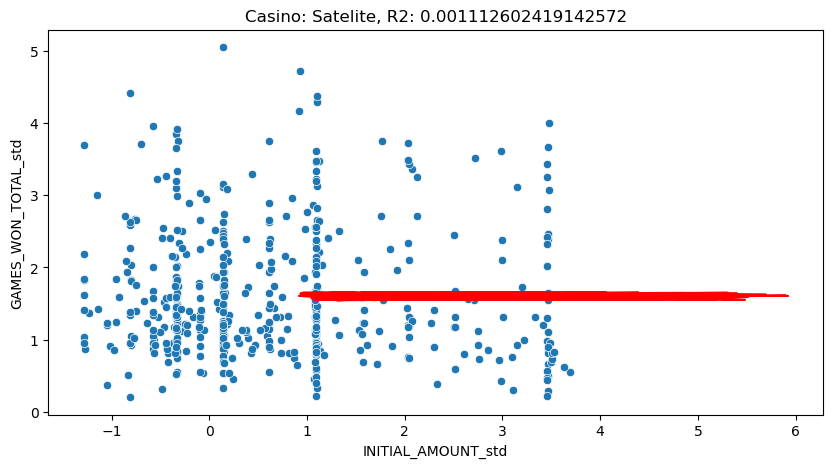

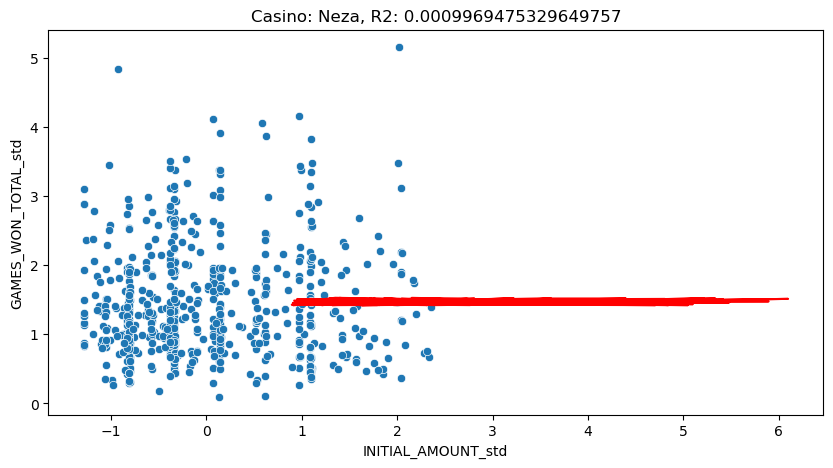

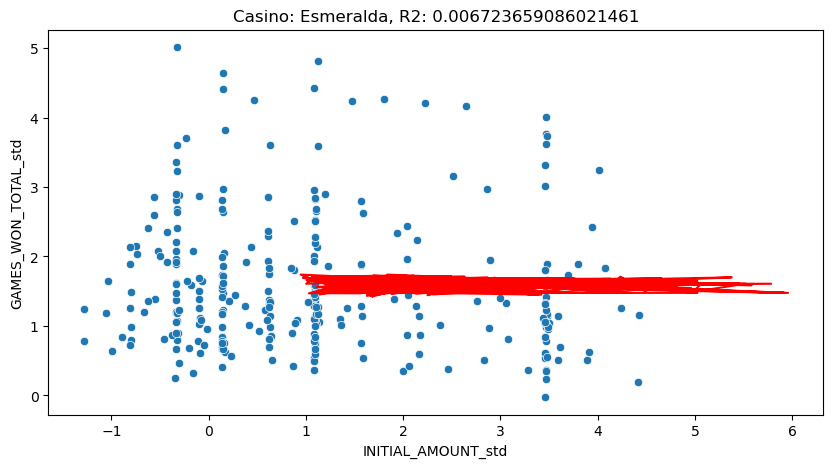

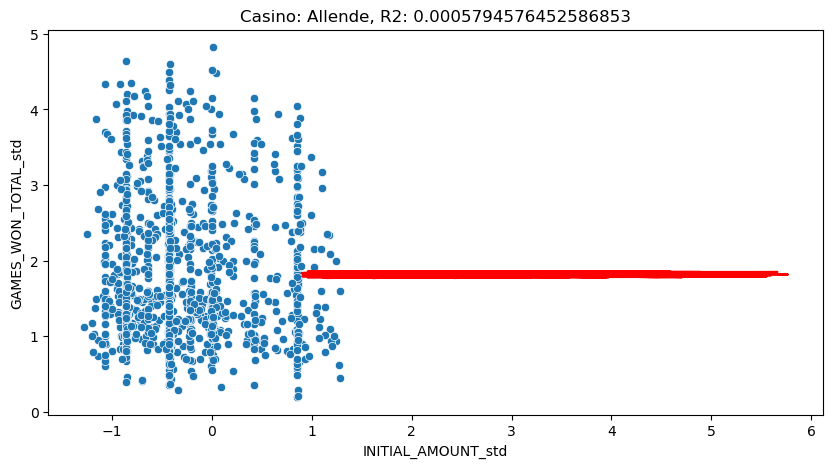

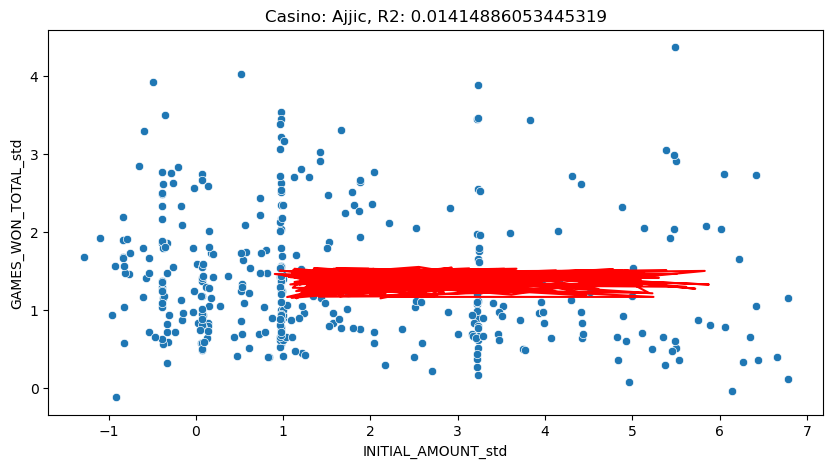

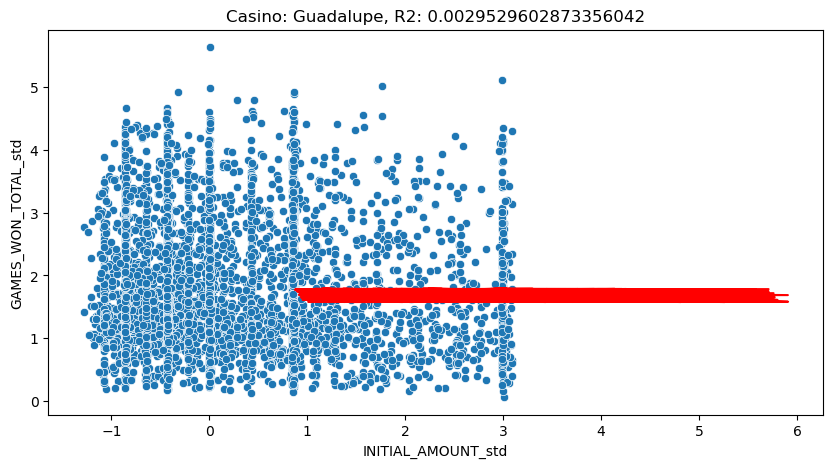

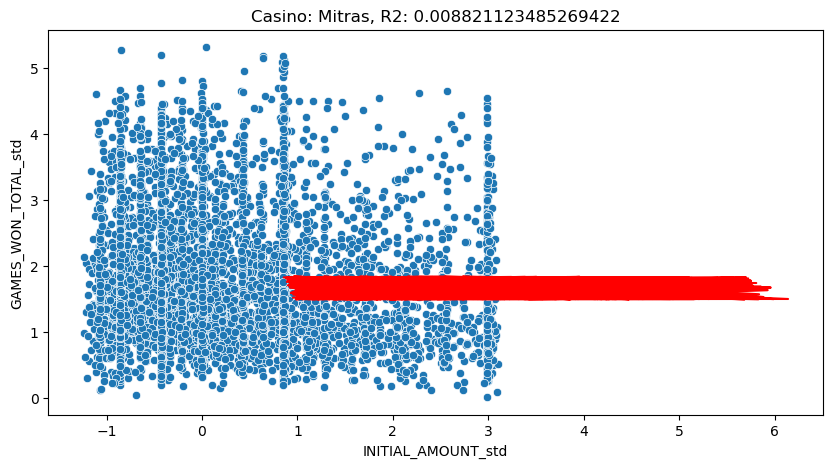

In [13]:
for casino in casinos:
    lr = LinearRegression()
    
    df_casino_cluster = df_cluster_1.loc[df_cluster_1['Casino'] == casino]

    X = df_casino_cluster[['INITIAL_AMOUNT_std']]  # Ahora es DataFrame (2D)
    y = df_casino_cluster['GAMES_WON_TOTAL_std']    # y puede ser Series (1D)
    
    lr.fit(X, y)
    y_hat = lr.predict(X)  # También se mantiene 2D en predict
    r2 = r2_score(y, y_hat)
    plt.figure(figsize=(10,5))
    plt.title(f"Casino: {casino}, R2: {r2}")
    sns.scatterplot(data=df_casino_cluster, x='INITIAL_AMOUNT_std', y='GAMES_WON_TOTAL_std')
    plt.plot(df_casino_cluster['PCA1'], y_hat, color='red')
    plt.show()

# Initial Amount v Games Played

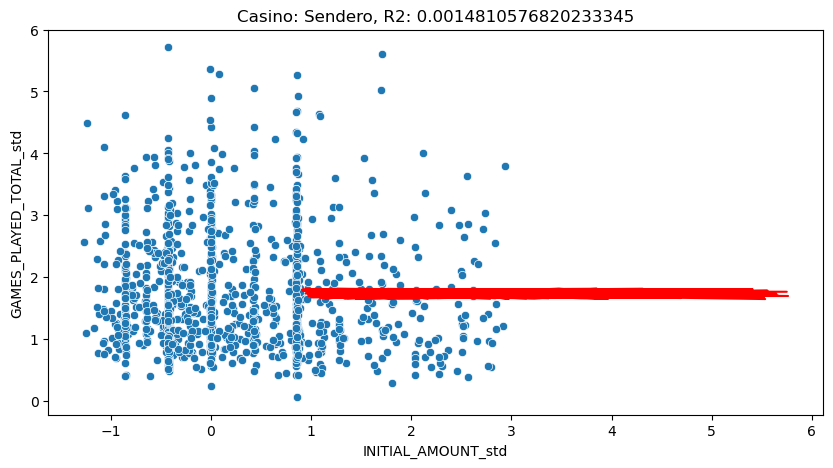

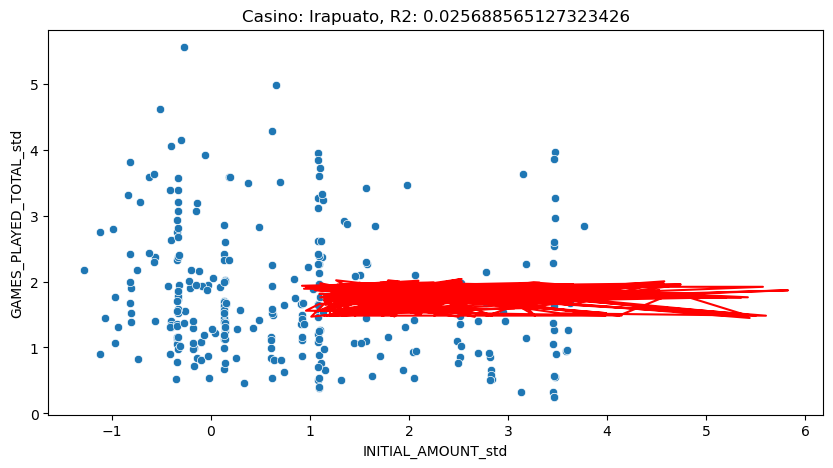

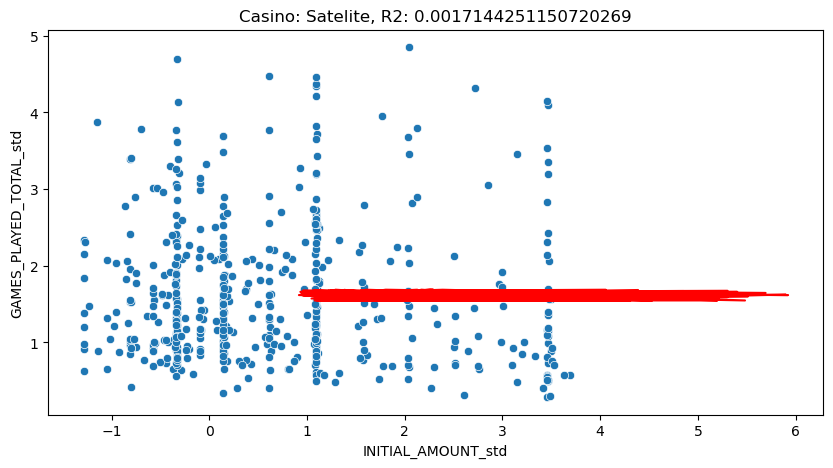

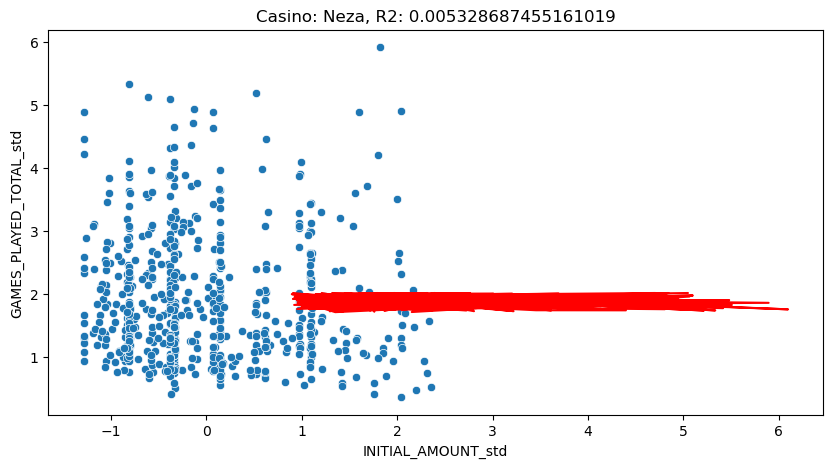

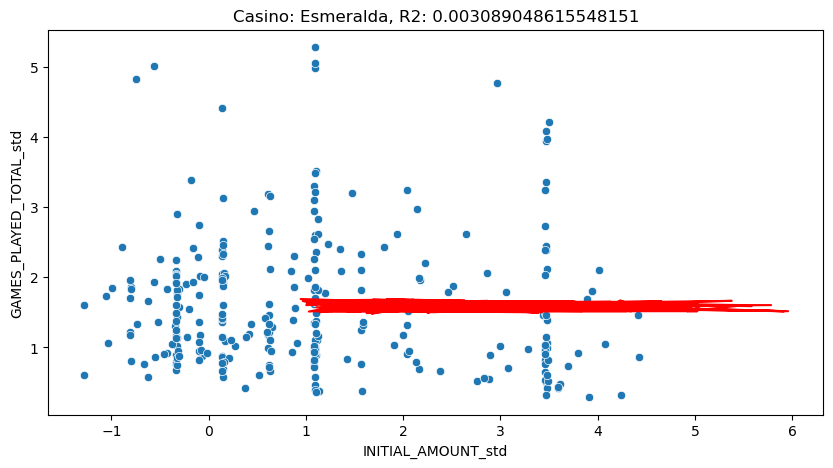

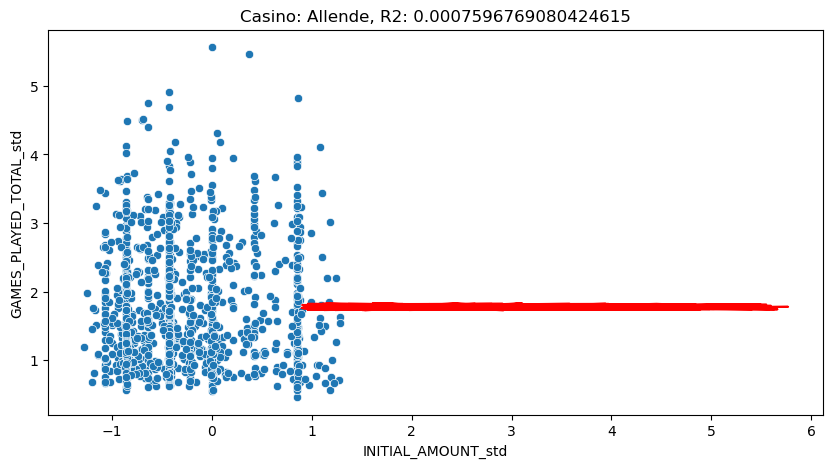

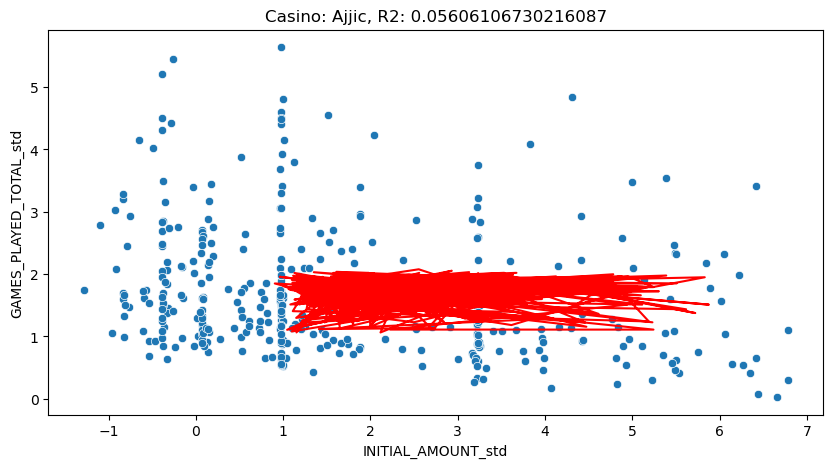

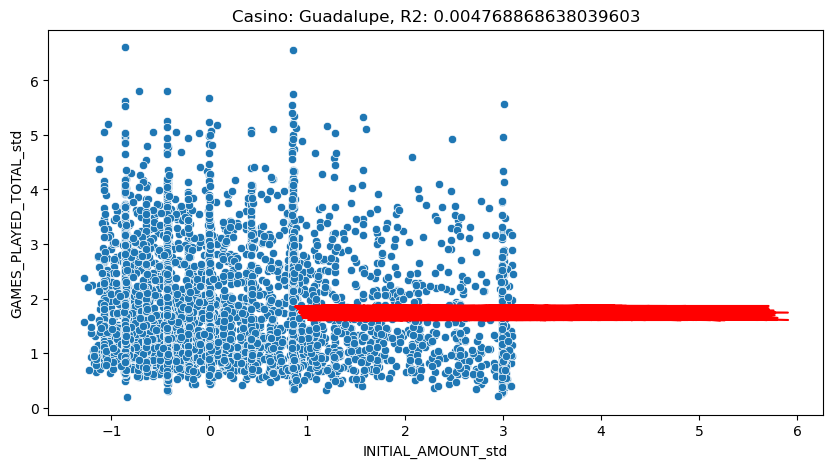

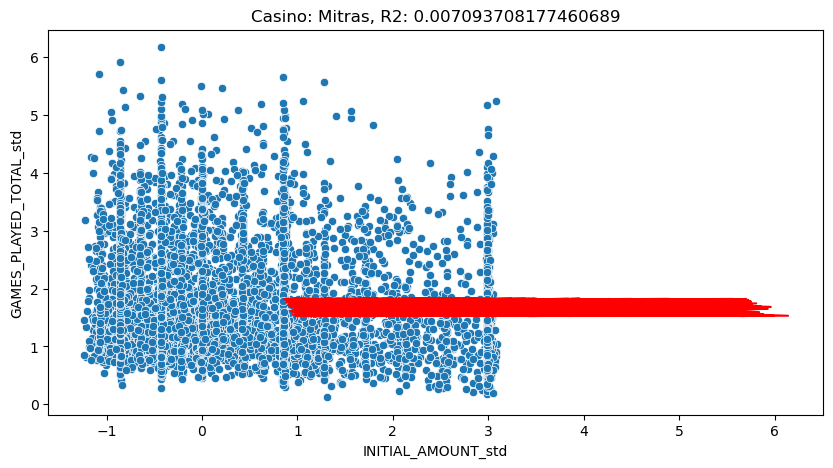

In [14]:
for casino in casinos:
    lr = LinearRegression()
    
    df_casino_cluster = df_cluster_1.loc[df_cluster_1['Casino'] == casino]

    X = df_casino_cluster[['INITIAL_AMOUNT_std']]  # Ahora es DataFrame (2D)
    y = df_casino_cluster['GAMES_PLAYED_TOTAL_std']    # y puede ser Series (1D)
    
    lr.fit(X, y)
    y_hat = lr.predict(X)  # También se mantiene 2D en predict
    r2 = r2_score(y, y_hat)
    plt.figure(figsize=(10,5))
    plt.title(f"Casino: {casino}, R2: {r2}")
    sns.scatterplot(data=df_casino_cluster, x='INITIAL_AMOUNT_std', y='GAMES_PLAYED_TOTAL_std')
    plt.plot(df_casino_cluster['PCA1'], y_hat, color='red')
    plt.show()